In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/BTP_work_Aut_2021

/content/drive/MyDrive/BTP_work_Aut_2021


*Cleaning txt file and converting to csv format*

In [3]:
import pandas as pd
dataset =pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())    

(2075259, 7)
                    Global_active_power  ... Sub_metering_3
datetime                                 ...               
2006-12-16 17:24:00               4.216  ...           17.0
2006-12-16 17:25:00               5.360  ...           16.0
2006-12-16 17:26:00               5.374  ...           17.0
2006-12-16 17:27:00               5.388  ...           17.0
2006-12-16 17:28:00               3.666  ...           17.0

[5 rows x 7 columns]


In [9]:
dataset.columns
#dataset.describe()

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
# mark all missing values
#import numpy as np
#dataset.replace('?', np.nan, inplace=True)
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] +
values[:,6])

In [14]:
# save updated dataset
#dataset.to_csv('household_power_consumption.csv')
#loading the csv file for our work
df =pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
print(df.head())

                     Global_active_power  ...  sub_metering_4
datetime                                  ...                
2006-12-16 17:24:00                4.216  ...       52.266670
2006-12-16 17:25:00                5.360  ...       72.333336
2006-12-16 17:26:00                5.374  ...       70.566666
2006-12-16 17:27:00                5.388  ...       71.800000
2006-12-16 17:28:00                3.666  ...       43.100000

[5 rows x 8 columns]


*Patterns in Observations Over Time*

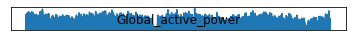

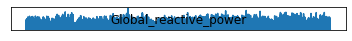

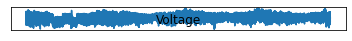

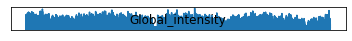

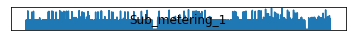

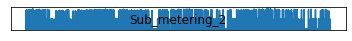

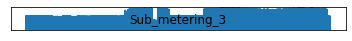

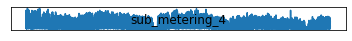

In [17]:
from matplotlib import pyplot
# line plot for each variable
pyplot.figure()
for i in range(len(df.columns)):
  # create subplot
  pyplot.subplot(len(df.columns), 1, i+1)
  # get variable name
  name = df.columns[i]
  # plot data
  pyplot.plot(df[name])
  # set title
  pyplot.title(name, y=0)
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
  pyplot.show()

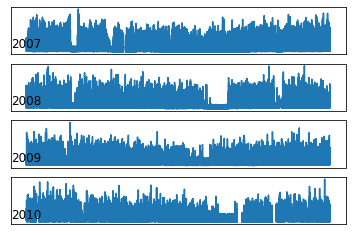

In [18]:
# plot active power for each year ( The first year, 2006, has less than one month of data, so will remove it from the plot).
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
  # prepare subplot
  ax = pyplot.subplot(len(years), 1, i+1)
  # determine the year to plot
  year = years[i]
  # get all observations for the year
  result = df[str(year)]
  # plot the active power for the year
  pyplot.plot(result['Global_active_power'])
  # add a title to the subplot
  pyplot.title(str(year), y=0, loc='left')
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
pyplot.show()

In [ ]:
We can see some common gross patterns across
the years, such as around Feb-Mar and around Aug-Sept where we see a marked decrease in
consumption. We also seem to see a downward trend over the summer months (middle of the
year in the northern hemisphere) and perhaps more consumption in the winter months towards
the edges of the plots. These may show an annual seasonal pattern in consumption. We can
also see a few patches of missing data in at least the first, third, and fourth plots.

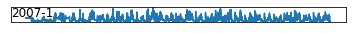

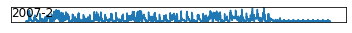

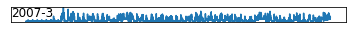

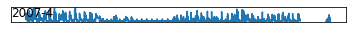

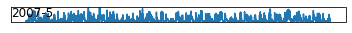

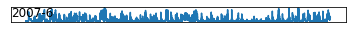

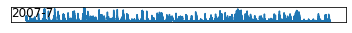

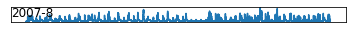

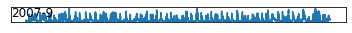

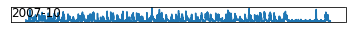

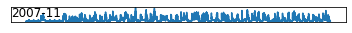

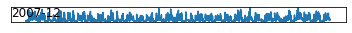

In [20]:
# monthly line plots for power usage dataset (for 2007)
# plot active power for each month in 2007
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
  # prepare subplot
  ax = pyplot.subplot(len(months), 1, i+1)
  # determine the month to plot
  month = '2007-' + str(months[i])
  # get all observations for the month
  result = df[month]
  # plot the active power for the month
  pyplot.plot(result['Global_active_power'])
  # add a title to the subplot
  pyplot.title(month, y=0, loc='left')
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
  pyplot.show()

In [ ]:
#Running the example creates a single image with 12 line plots, one for each month in 2007.
#We can see the sign-wave of power consumption of the days within each month. This is good as
#we would expect some kind of daily pattern in power consumption. We can see that there are
#stretches of days with very minimal consumption, such as in August and in April. These may
#represent vacation periods where the home was unoccupied and where power consumption was
#minimal.
#Important observation:Time of year, specifically the season and the weather that it brings, will be an important factor in modeling this data, as would be expected.

Data Distribution

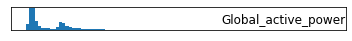

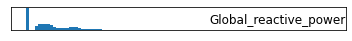

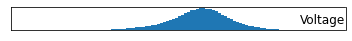

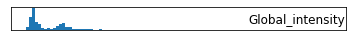

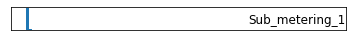

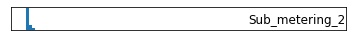

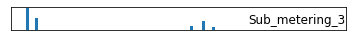

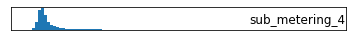

In [21]:
pyplot.figure()
for i in range(len(dataset.columns)):
  # create subplot
  pyplot.subplot(len(dataset.columns), 1, i+1)
  # get variable name
  name = dataset.columns[i]
  # create histogram
  df[name].hist(bins=100)
  # set title
  pyplot.title(name, y=0, loc='right')
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
  pyplot.show()
#Results
#Distribution of Global_active_power is bimodel with 2 mean groups of distributions.
#We can see that active and reactive power, intensity, as well as the sub-metered power
#are all skewed distributions down towards small watt-hour or kilowatt values. We can also see
#that distribution of voltage data is strongly Gaussian.

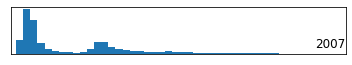

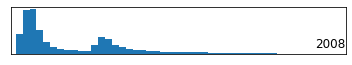

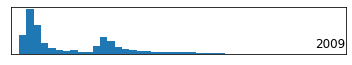

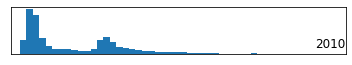

In [22]:
# yearly histogram plots for power usage dataset
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
  # prepare subplot
  ax = pyplot.subplot(len(years), 1, i+1)
  # determine the year to plot
  year = years[i]
  # get all observations for the year
  result = df[str(year)]
  # plot the active power for the year
  result['Global_active_power'].hist(bins=100)
  # zoom in on the distribution
  ax.set_xlim(0, 5)
  # add a title to the subplot
  pyplot.title(str(year), y=0, loc='right')
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
  pyplot.show() 

Modelling Experimentations

Forecasting
consumption in turn, at scale, could aid in a utility company forecasting demand, which is a
widely studied and important problem.
Possible methods:
->Forecast hourly consumption for the next day.
->Forecast daily consumption for the next week.
->Forecast daily consumption for the next month.
->Forecast monthly consumption for the next year.


**Naive Methods (Baseline)**

In [23]:
# load and clean-up the power usage dataset
from numpy import nan
from numpy import isnan
from pandas import read_csv
# fill missing values with a value at the same time one day ago
def fill_missing(values):
  one_day = 60 * 24
  for row in range(values.shape[0]):
    for col in range(values.shape[1]):
      if isnan(values[row, col]): 
       values[row, col] = values[row - one_day, col]
# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] +
values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [24]:
# resample minute data to total for each day for the power usage dataset
from pandas import read_csv
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...    14680.933319
2006-12-17             3390.460  ...    36946.666732
2006-12-18             2203.826  ...    19028.433281
2006-12-19             1666.194  ...    13131.900043
2006-12-20             2225.748  ...    20384.800011

[5 rows x 8 columns]


Given recent
power consumption, what is the expected power consumption for the week ahead? So, Having multiple forecasts at once in a week is known as ***multi-step forecasting***.

In [25]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  # calculate an RMSE score for each day
  for i in range(actual.shape[1]):
    # calculate mse
    mse = mean_squared_error(actual[:, i], predicted[:, i])
    # calculate rmse
    rmse = sqrt(mse)
    # store
    scores.append(rmse)
    # calculate overall RMSE
  s = 0
  for row in range(actual.shape[0]):
    for col in range(actual.shape[1]):
      s += (actual[row, col] - predicted[row, col])**2
  score = sqrt(s / (actual.shape[0] * actual.shape[1]))
  return score, scores

In [26]:
# split the power usage dataset into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv
# split a univariate dataset into train/test sets
def split_dataset(data):
  # split into standard weeks
  train, test = data[1:-328], data[-328:-6]
  # restructure into windows of weekly data
  train = array(split(train, len(train)/7))
  test = array(split(test, len(test)/7))
  return train, test
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0,
infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1309.2679999999998
(46, 7, 8)
2083.4539999999984 2197.006000000004


In [27]:
# evaluate a single model
def evaluate_model(model_func, train, test):
  # history is a list of weekly data
  history = [x for x in train]
  # walk-forward validation over each week
  predictions = list()
  for i in range(len(test)):
    # predict the week
    yhat_sequence = model_func(history)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next week
    history.append(test[i, :])
  predictions = array(predictions)
  # evaluate predictions days for each week
  score, scores = evaluate_forecasts(test[:, :, 0], predictions)
  return score, scores

In [29]:
# summarize scores
def summarize_scores(name, score, scores):
  s_scores = ', '.join(['%.1f' % s for s in scores])
  print('%s: [%.3f] %s' % (name, score, s_scores))

daily: [511.886] 452.9, 596.4, 532.1, 490.5, 534.3, 481.5, 482.0


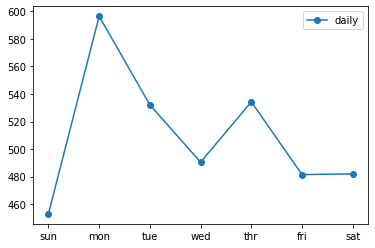

weekly: [469.389] 567.6, 500.3, 411.2, 466.1, 471.9, 358.3, 482.0


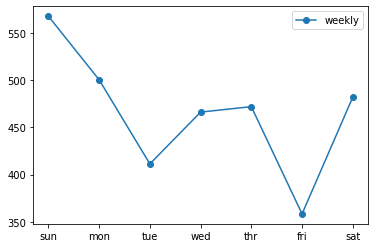

week-oya: [465.294] 550.0, 446.7, 398.6, 487.0, 459.3, 313.5, 555.1


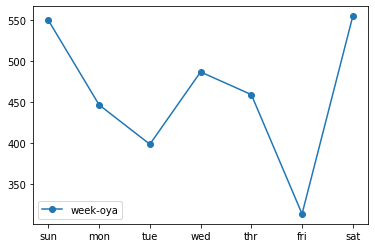

In [30]:
# naive forecast strategies for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# daily persistence model
def daily_persistence(history):
  # get the data for the prior week
  last_week = history[-1]
  # get the total active power for the last day
  value = last_week[-1, 0]
  # prepare 7 day forecast
  forecast = [value for _ in range(7)]
  return forecast
# weekly persistence model
def weekly_persistence(history):
  # get the data for the prior week
  last_week = history[-1]
  return last_week[:, 0]
  # week one year ago persistence model
def week_one_year_ago_persistence(history):
  # get the data for the prior week
  last_week = history[-52]
  return last_week[:, 0]
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0,
infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# define the names and functions for the models we wish to evaluate
models = dict()
models['daily'] = daily_persistence
models['weekly'] = weekly_persistence
models['week-oya'] = week_one_year_ago_persistence
# evaluate each model
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
for name, func in models.items():
  # evaluate and get scores
  score, scores = evaluate_model(func, train, test)
  # summarize scores
  summarize_scores(name, score, scores)
  # plot scores
  pyplot.plot(days, scores, marker='o', label=name)
  # show plot
  pyplot.legend()
  pyplot.show()